# Visualize Features


In [1]:
%config InlineBackend.figure_format='retina'
from ekorpkit import eKonf

eKonf.setLogger("WARNING")
print("version:", eKonf.__version__)
print("is notebook?", eKonf.is_notebook())
print("is colab?", eKonf.is_colab())
print("evironment varialbles:")
eKonf.print(eKonf.env().dict())

INFO:ekorpkit.base:IPython version: (6, 9, 0), client: jupyter_client
INFO:ekorpkit.base:Google Colab not detected.


version: 0.1.35+0.g69734d6.dirty
is notebook? True
is colab? False
evironment varialbles:
{'CUDA_DEVICE_ORDER': None,
 'CUDA_VISIBLE_DEVICES': None,
 'EKORPKIT_CONFIG_DIR': '/workspace/projects/ekorpkit-book/config',
 'EKORPKIT_DATA_DIR': None,
 'EKORPKIT_LOG_LEVEL': 'WARNING',
 'EKORPKIT_PROJECT': 'ekorpkit-book',
 'EKORPKIT_WORKSPACE_ROOT': '/workspace',
 'KMP_DUPLICATE_LIB_OK': 'TRUE',
 'NUM_WORKERS': 230}


In [2]:
start_year = 1999
data_dir = "../data/fomc"
eKonf.env().FRED_API_KEY


pydantic.types.SecretStr

## Build and load a feature set with tones


In [14]:
econ_train_small = eKonf.load_data("econ_train_small.parquet", data_dir)
econ_train_small


,target,prev_decision,GDP_diff_prev,PMI,EMP_diff_prev,RSALES_diff_year,UNEMP_diff_prev,HSALES_diff_year,Inertia_diff,Balanced_diff
date,,,,,,,,,,
1982-10-05,Cut,0.0,0.456199,38.8,-0.201426,2.094256,3.061224,42.307692,0.0,0.0
1982-11-16,Cut,-1.0,-0.382299,39.4,-0.309476,2.094256,2.970297,34.831461,0.0,0.0
1982-12-21,Hold,-1.0,-0.382299,39.2,-0.136097,2.094256,3.846154,45.026178,0.0,0.0
1983-01-14,Hold,0.0,-0.382299,42.8,-0.016895,2.094256,0.000000,14.004376,0.0,0.0
1983-01-21,Hold,0.0,-0.382299,42.8,-0.016895,2.094256,0.000000,14.004376,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
2021-11-03,Hold,0.0,0.570948,60.5,0.288624,8.474656,-9.615385,-26.135217,0.0,0.0
2021-12-15,Hold,0.0,0.570948,60.6,0.437147,10.977142,-8.695652,-11.163337,0.0,0.0
2022-01-26,Hold,0.0,0.570948,58.8,0.395555,9.101289,-7.142857,-3.673938,0.0,0.0


In [15]:
cols = [
    "polarity_diffusion_minutes",
    "polarity_diffusion_speech",
    "polarity_diffusion_statement",
    "finbert_diffusion_minutes",
    "finbert_diffusion_speech",
    "finbert_diffusion_statement",
    "t5_diffusion_minutes",
    "t5_diffusion_speech",
    "t5_diffusion_statement",
    "lm_tones",
    "finbert_tones",
    "t5_tones",
]
fomc_train_tones = econ_train_small.merge(
    merged_tone_data[cols], left_index=True, right_index=True
)
fomc_train_tones.index.name = "date"
eKonf.save_data(fomc_train_tones, "fomc_train_tones.parquet", data_dir)
fomc_train_tones

,target,prev_decision,GDP_diff_prev,PMI,EMP_diff_prev,RSALES_diff_year,UNEMP_diff_prev,HSALES_diff_year,Inertia_diff,Balanced_diff,...,polarity_diffusion_statement,finbert_diffusion_minutes,finbert_diffusion_speech,finbert_diffusion_statement,t5_diffusion_minutes,t5_diffusion_speech,t5_diffusion_statement,lm_tones,finbert_tones,t5_tones
date,,,,,,,,,,,,,,,,,,,,,
1999-02-03,Hold,0.0,1.616191,46.8,0.286880,4.952373,0.000000,19.672131,0.0,0.0,...,-0.363636,0.662069,0.222222,0.636364,0.420690,0.111111,0.136364,-0.243343,0.506885,0.222721
1999-03-30,Hold,0.0,1.616191,51.7,0.327325,5.932944,2.325581,-2.078522,0.0,0.0,...,-0.363636,0.570048,0.381295,0.636364,0.405797,0.187050,0.136364,-0.241290,0.529236,0.243070
1999-05-18,Hold,0.0,0.943827,52.3,0.288551,4.601659,2.380952,6.004619,0.0,0.0,...,-0.363636,0.719424,0.383234,0.636364,0.474820,0.245509,0.136364,-0.112051,0.579674,0.285564
1999-06-30,Hike,0.0,0.943827,54.3,0.164078,5.248177,-2.325581,0.112740,0.0,0.0,...,0.000000,0.767606,0.097561,1.000000,0.514085,0.097561,0.625000,-0.050040,0.621722,0.412215
1999-08-24,Hike,1.0,0.835000,53.6,0.251764,6.166822,0.000000,2.739726,0.0,0.0,...,-0.346154,0.773810,0.178947,0.692308,0.583333,0.178947,0.269231,-0.135226,0.548355,0.343837
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-16,Hold,0.0,1.533890,61.6,0.308928,22.314413,-3.333333,4.815864,0.0,0.0,...,0.307692,0.666667,0.464567,0.615385,0.407407,0.330709,0.384615,0.086359,0.582206,0.374244
2021-07-28,Hold,0.0,1.533890,60.9,0.383765,13.352829,1.724138,-22.559653,0.0,0.0,...,0.384615,0.640138,0.157895,0.461538,0.456747,0.228070,0.615385,0.167826,0.419857,0.433401
2021-09-22,Hold,0.0,1.640747,59.7,0.353173,9.952513,-3.703704,-33.783784,0.0,0.0,...,0.461538,0.611842,0.172840,0.538462,0.414474,0.148148,0.538462,0.176087,0.441048,0.367028


In [16]:
econ_cols = [
    "prev_decision",
    "GDP_diff_prev",
    "PMI",
    "EMP_diff_prev",
    "RSALES_diff_year",
    "UNEMP_diff_prev",
    "HSALES_diff_year",
    "Inertia_diff",
    "Balanced_diff",
]
data_cols = econ_cols + cols

cfg = eKonf.compose("dataset=feature_build")
cfg.name = "fomc_tone_features"
cfg.data_dir = data_dir
cfg.data_file = "fomc_train_tones.parquet"
cfg.force.build = True
cfg.pipeline.split_sampling.stratify_on = "target"
cfg.pipeline.split_sampling.random_state = 5678
cfg.pipeline.split_sampling.test_size = 0.3
cfg.pipeline.reset_index.index_column_name = "date"
cfg.column_info.columns.index = "index"
cfg.column_info.columns.id = "date"
cfg.column_info.columns.x = data_cols
cfg.column_info.columns.y = "target"
f_tones = eKonf.instantiate(cfg)
f_tones.persist()


INFO:ekorpkit.base:Applying pipe: functools.partial(<function load_dataframe at 0x7f4a924ba1f0>)
INFO:ekorpkit.base:Applying pipe: functools.partial(<function reset_index at 0x7f4a921d7ca0>)
INFO:ekorpkit.base:Applying pipe: functools.partial(<function split_sampling at 0x7f4a921e43a0>)


In [17]:
cfg = eKonf.compose(config_group="dataset=feature")
cfg.name = "fomc_tone_features"
cfg.data_dir = data_dir
f_tones = eKonf.instantiate(cfg)
print(f_tones)


FeatureSet : fomc_tone_features


In [18]:
f_tones.COLUMN.X


['prev_decision',
 'GDP_diff_prev',
 'PMI',
 'EMP_diff_prev',
 'RSALES_diff_year',
 'UNEMP_diff_prev',
 'HSALES_diff_year',
 'Inertia_diff',
 'Balanced_diff',
 'polarity_diffusion_minutes',
 'polarity_diffusion_speech',
 'polarity_diffusion_statement',
 'finbert_diffusion_minutes',
 'finbert_diffusion_speech',
 'finbert_diffusion_statement',
 't5_diffusion_minutes',
 't5_diffusion_speech',
 't5_diffusion_statement',
 'lm_tones',
 'finbert_tones',
 't5_tones']

## Visualize Features


In [19]:
f_tones.y_train = f_tones.transform_labels(f_tones.y_train)
f_tones.y_dev = f_tones.transform_labels(f_tones.y_dev)
f_tones.y_test = f_tones.transform_labels(f_tones.y_test)


In [20]:
X_cols = f_tones.COLUMN.X
y_col = f_tones.COLUMN.Y
print(f_tones.classes, X_cols, y_col)


['Cut', 'Hike', 'Hold'] ['prev_decision', 'GDP_diff_prev', 'PMI', 'EMP_diff_prev', 'RSALES_diff_year', 'UNEMP_diff_prev', 'HSALES_diff_year', 'Inertia_diff', 'Balanced_diff', 'polarity_diffusion_minutes', 'polarity_diffusion_speech', 'polarity_diffusion_statement', 'finbert_diffusion_minutes', 'finbert_diffusion_speech', 'finbert_diffusion_statement', 't5_diffusion_minutes', 't5_diffusion_speech', 't5_diffusion_statement', 'lm_tones', 'finbert_tones', 't5_tones'] target


In [21]:
f_tones.train_data.head()


,date,target,prev_decision,GDP_diff_prev,PMI,EMP_diff_prev,RSALES_diff_year,UNEMP_diff_prev,HSALES_diff_year,Inertia_diff,...,finbert_diffusion_minutes,finbert_diffusion_speech,finbert_diffusion_statement,t5_diffusion_minutes,t5_diffusion_speech,t5_diffusion_statement,lm_tones,finbert_tones,t5_tones,split
index,,,,,,,,,,,,,,,,,,,,,
0,2010-04-28,2,0.0,1.067962,58.8,0.139555,5.061896,1.020408,12.389381,0.0,...,0.677083,0.117647,0.583333,0.359375,0.117647,0.333333,-0.050143,0.459355,0.270118,train
1,2008-10-29,0,-1.0,0.572295,44.8,-0.335245,-6.288802,0.000000,-36.880466,0.0,...,0.628378,0.388889,0.791667,0.283784,0.126984,0.208333,-0.297673,0.602978,0.206367,train
2,2018-12-19,1,0.0,0.481953,58.8,0.068241,1.349789,0.000000,-15.611814,0.0,...,0.650206,0.689394,0.444444,0.362140,0.378788,0.333333,-0.017770,0.594681,0.358087,train
3,2009-08-12,2,0.0,-0.169238,49.9,-0.259526,-7.390883,0.000000,-13.836478,0.0,...,0.676806,0.458333,0.545455,0.334601,0.208333,0.454545,-0.117091,0.560198,0.332493,train
4,2000-11-15,2,0.0,0.099774,48.7,-0.001511,2.243324,0.000000,6.995413,0.0,...,0.752381,0.642276,0.842105,0.466667,0.471545,0.736842,0.016816,0.745588,0.558351,train


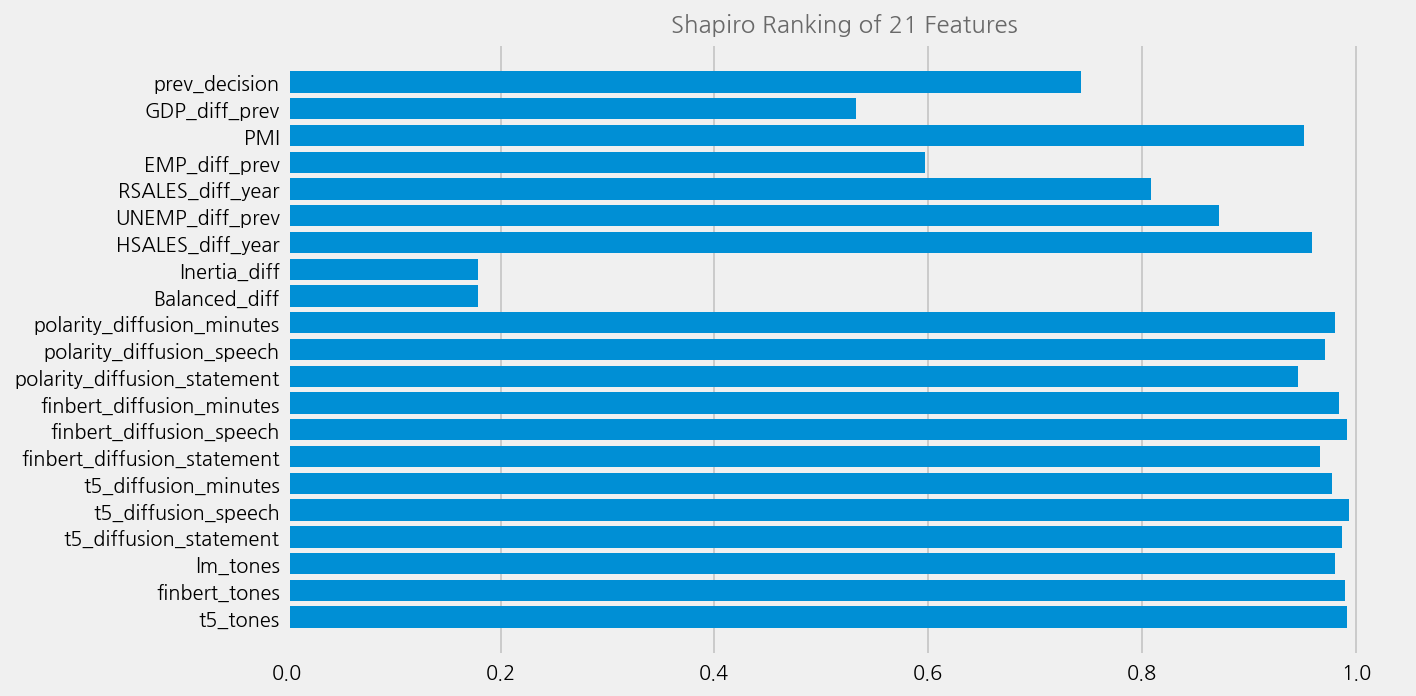

In [22]:
cfg = eKonf.compose(config_group="visualize/plot=rank1d")
cfg.plots[0].x = X_cols
cfg.plots[0].y = y_col
cfg.plots[0].classes = f_tones.classes
eKonf.instantiate(cfg, data=f_tones.data)


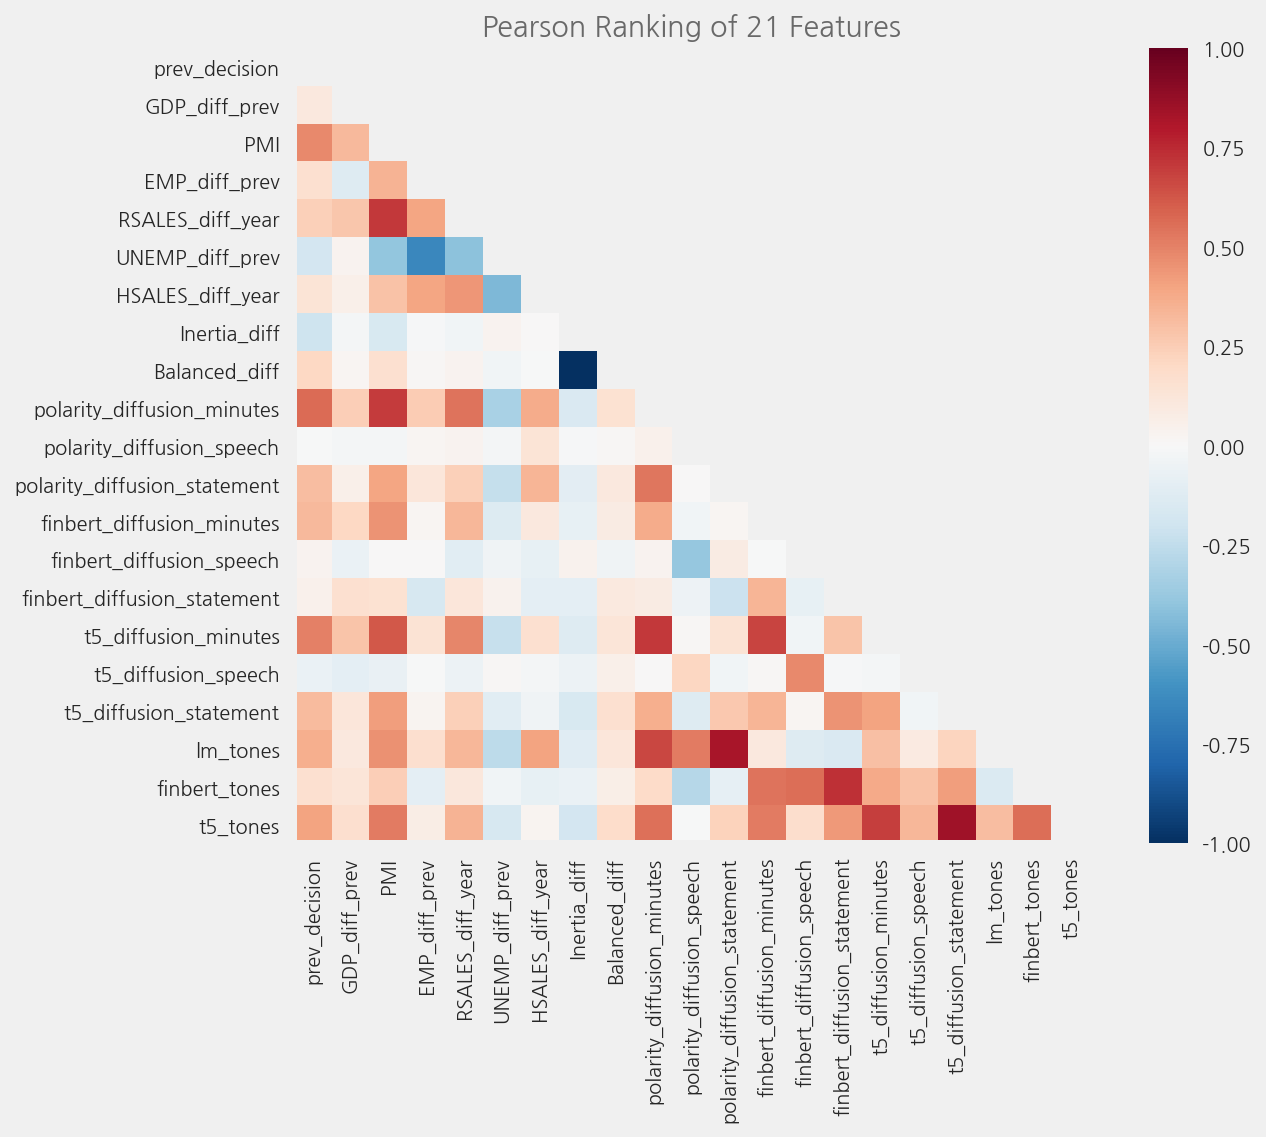

In [23]:
cfg = eKonf.compose(config_group="visualize/plot=rank2d")
cfg.plots[0].x = X_cols
cfg.plots[0].y = y_col
cfg.figure.figsize = (10, 8)
eKonf.instantiate(cfg, data=f_tones.data)
